<a href="https://colab.research.google.com/github/neosavvy/hodl-coastguard/blob/main/UnsupervisedLearningExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

from google.colab import drive


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# In case you need it - here are some jpg download commands 
#!rm -rf /content/drive/MyDrive/BoatsForHodl/frames
#!rm -rf /content/drive/MyDrive/BoatsForHodl/frames.zip

# Hope this part helps us maybe create a consistent directory structure 

!wget https://www.dropbox.com/s/w6lk6fw6uhfuez3/frames.zip
!mv /content/frames.zip /content/drive/MyDrive/BoatsForHodl
!unzip -q /content/drive/MyDrive/BoatsForHodl/frames.zip -d /content/drive/MyDrive/BoatsForHodl/

--2022-05-02 22:42:44--  https://www.dropbox.com/s/w6lk6fw6uhfuez3/frames.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/w6lk6fw6uhfuez3/frames.zip [following]
--2022-05-02 22:42:44--  https://www.dropbox.com/s/raw/w6lk6fw6uhfuez3/frames.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4b9d4854420c6346eb74c6a560.dl.dropboxusercontent.com/cd/0/inline/Bkjtepj7zcsUJYjKsHhZPMHx7nmsSNXqIu5SlegaFZjgxCXOVpapXkaAZd4PGen0LGMFQMdewx-jDTE6Rpa7vs0DeSBcK92LIK2CFozoL9OWsQKqXLH9UbEpKRnXunE2C7qVaGUMp42unlWdEy1HFB8oo7ja74PbmLEZ1RyM7FvF6w/file# [following]
--2022-05-02 22:42:45--  https://uc4b9d4854420c6346eb74c6a560.dl.dropboxusercontent.com/cd/0/inline/Bkjtepj7zcsUJYjKsHhZPMHx7nmsSNXqIu5SlegaFZjgxCXOVpapXkaAZd4PGen0LGMFQMdew

In [5]:
#path = r"/content/drive/MyDrive/MIT/Deep Learning/Data/Alon"
path = r"/content/drive/MyDrive/BoatsForHodl/frames"
# # change the working directory to the path where the images are located
# os.chdir(path)

# # this list holds all the image filename
# flowers = []


# # creates a ScandirIterator aliased as files

# #with Path(path).glob('**/*.exe') as files:
#   # loops through each file in the directory
# #paths = Path(path).glob('**/*.exe')
#  #   for file in paths:
# for file in Path(path).glob('**/*.jpg'):
#    # if file.name.endswith('.jpg'):
#           # adds only the image files to the flowers list
#       flowers.append(file.name)
            
# print (len(flowers))        

In [6]:
maybe_boats = glob.glob(f"{path}/**/*.jpg")

In [7]:
            
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features
   

553476096/553467096 [==============================] - 8s 0us/step


In [60]:
from datetime import datetime

data = {}
limit = 2500

print(f"About to extract features for {limit} images")

count = 0
# lop through each image in the dataset

start_time = datetime.now()
print(f"Starting processing at {start_time}")

for maybe_boat in maybe_boats:
    if count == limit:
      break

    if count % 50 == 0:
      now = datetime.now()
      print(f"Processing batch at index {count} of {limit} at {now}")

    # try to extract the features and update the dictionary
    try:
        feat = extract_features(maybe_boat,model)
        data[maybe_boat] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except Exception as e:
        print(f"Something went wrong trying to deal with a maybe_boat {e}")

    count = count + 1
          

About to extract features for 2500 images
Starting processing at 2022-05-03 01:03:38.099810
Processing batch at index 0 of 2500 at 2022-05-03 01:03:38.100519
Processing batch at index 50 of 2500 at 2022-05-03 01:04:07.425904
Processing batch at index 100 of 2500 at 2022-05-03 01:04:36.545941
Processing batch at index 150 of 2500 at 2022-05-03 01:05:05.950890
Processing batch at index 200 of 2500 at 2022-05-03 01:05:34.741842
Processing batch at index 250 of 2500 at 2022-05-03 01:06:03.162006
Processing batch at index 300 of 2500 at 2022-05-03 01:06:32.087358
Processing batch at index 350 of 2500 at 2022-05-03 01:07:00.595132
Processing batch at index 400 of 2500 at 2022-05-03 01:07:29.060966
Processing batch at index 450 of 2500 at 2022-05-03 01:07:57.955544
Processing batch at index 500 of 2500 at 2022-05-03 01:08:26.794814
Processing batch at index 550 of 2500 at 2022-05-03 01:08:55.790138
Processing batch at index 600 of 2500 at 2022-05-03 01:09:24.624951
Processing batch at index 6

In [61]:

# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

feat

array([[0.        , 0.        , 1.4665147 , ..., 0.9626175 , 0.        ,
        0.8111979 ],
       [0.        , 0.        , 1.0998132 , ..., 0.        , 0.        ,
        1.1612023 ],
       [0.6940397 , 1.3152857 , 2.6096654 , ..., 0.        , 0.        ,
        0.63560253],
       ...,
       [0.        , 0.39651504, 2.7739387 , ..., 0.        , 0.        ,
        0.2719702 ],
       [0.        , 0.3260993 , 3.1235137 , ..., 0.        , 0.        ,
        0.40786815],
       [0.        , 0.        , 1.74422   , ..., 0.        , 0.93540305,
        0.21511105]], dtype=float32)

In [62]:

# # get the unique labels (from the flower_labels.csv)
# df = pd.read_csv('flower_labels.csv')
# label = df['label'].tolist()
# unique_labels = list(set(label))
np.shape(feat)

(2500, 4096)

In [63]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=20, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [64]:

# cluster feature vectors
kmeans = KMeans(n_clusters=20, random_state=22)
kmeans.fit(x)


KMeans(n_clusters=20, random_state=22)

In [65]:

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [66]:
groups

{0: ['/content/drive/MyDrive/BoatsForHodl/frames/05_30_16_881/05_30_16_881_769.jpg',
  '/content/drive/MyDrive/BoatsForHodl/frames/05_30_16_881/05_30_16_881_841.jpg',
  '/content/drive/MyDrive/BoatsForHodl/frames/05_30_16_881/05_30_16_881_975.jpg',
  '/content/drive/MyDrive/BoatsForHodl/frames/18_50_42_636/18_50_42_636_2032.jpg',
  '/content/drive/MyDrive/BoatsForHodl/frames/18_50_42_636/18_50_42_636_1521.jpg',
  '/content/drive/MyDrive/BoatsForHodl/frames/18_50_42_636/18_50_42_636_1522.jpg',
  '/content/drive/MyDrive/BoatsForHodl/frames/18_50_42_636/18_50_42_636_1525.jpg',
  '/content/drive/MyDrive/BoatsForHodl/frames/18_50_42_636/18_50_42_636_1517.jpg',
  '/content/drive/MyDrive/BoatsForHodl/frames/18_50_42_636/18_50_42_636_1531.jpg',
  '/content/drive/MyDrive/BoatsForHodl/frames/18_50_42_636/18_50_42_636_1524.jpg',
  '/content/drive/MyDrive/BoatsForHodl/frames/18_50_42_636/18_50_42_636_1537.jpg',
  '/content/drive/MyDrive/BoatsForHodl/frames/18_50_42_636/18_50_42_636_1516.jpg',
  '/

In [37]:
# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 244 to 30


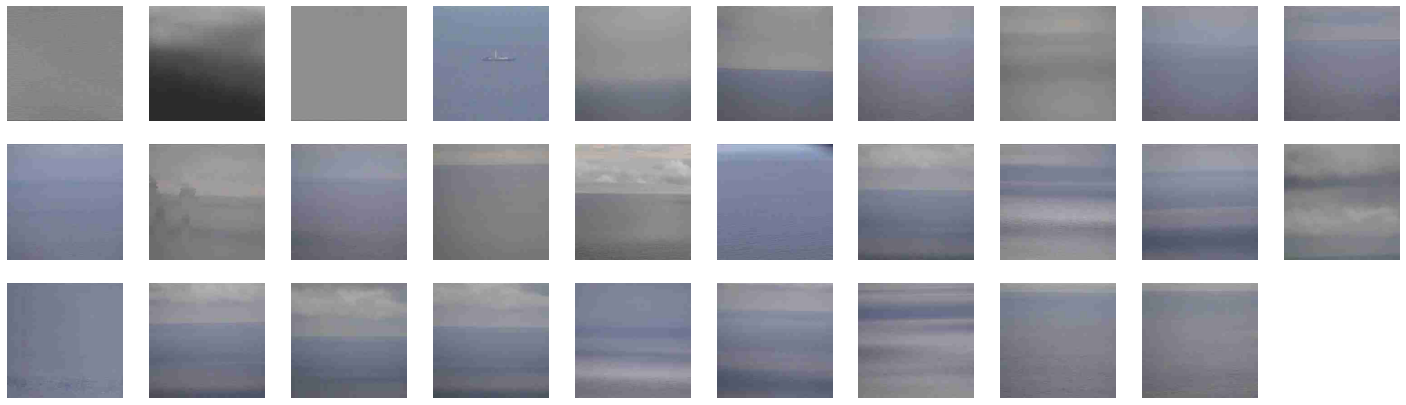

In [67]:
view_cluster(0)

Clipping cluster size from 95 to 30


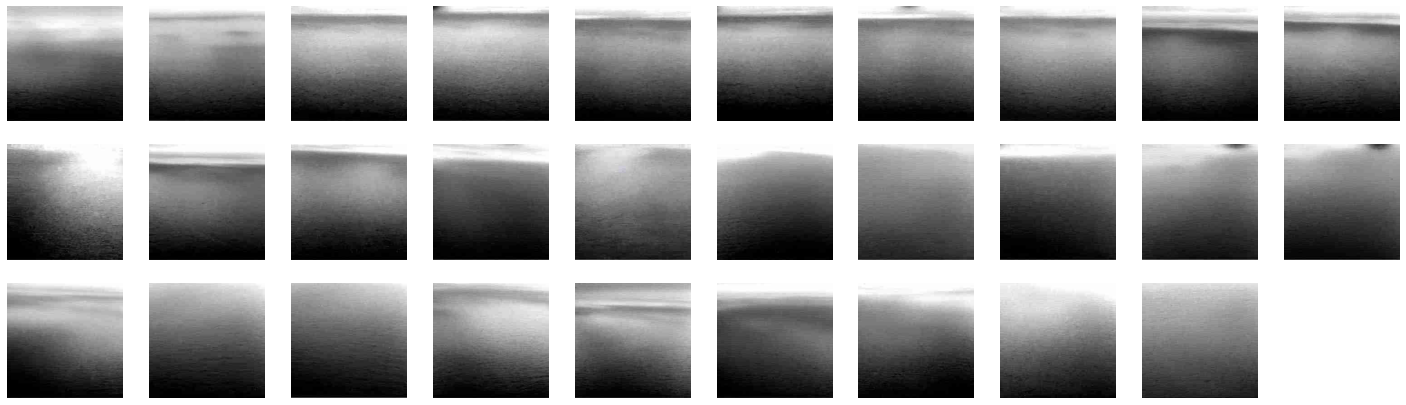

In [68]:
view_cluster(1)

Clipping cluster size from 115 to 30


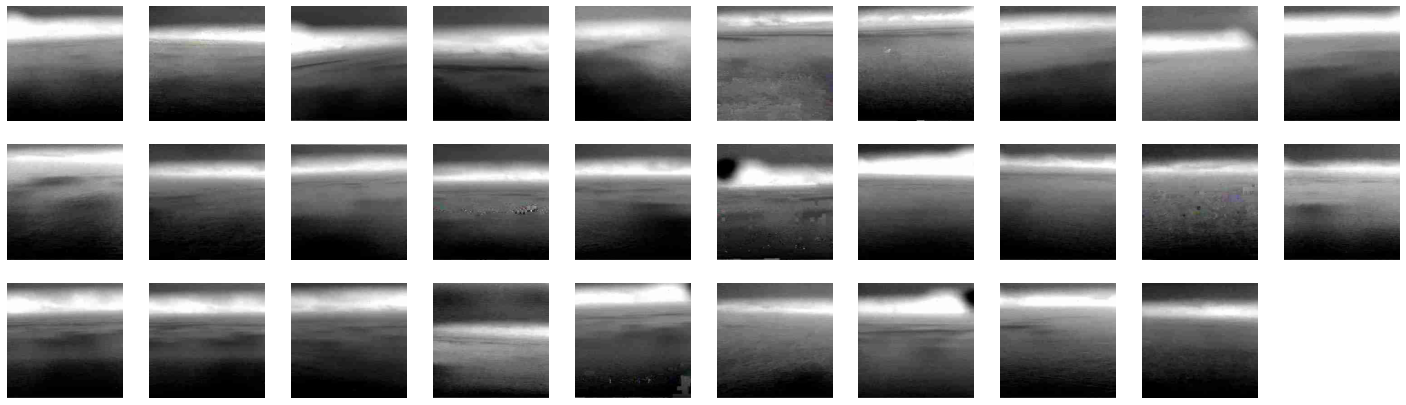

In [69]:
view_cluster(2)

Clipping cluster size from 105 to 30


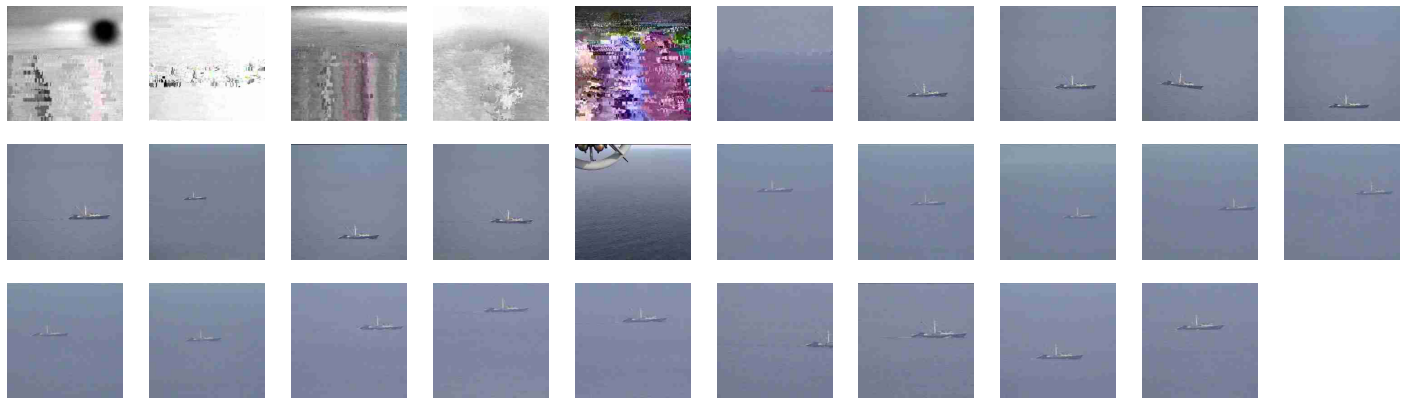

In [70]:
view_cluster(3)

Clipping cluster size from 86 to 30


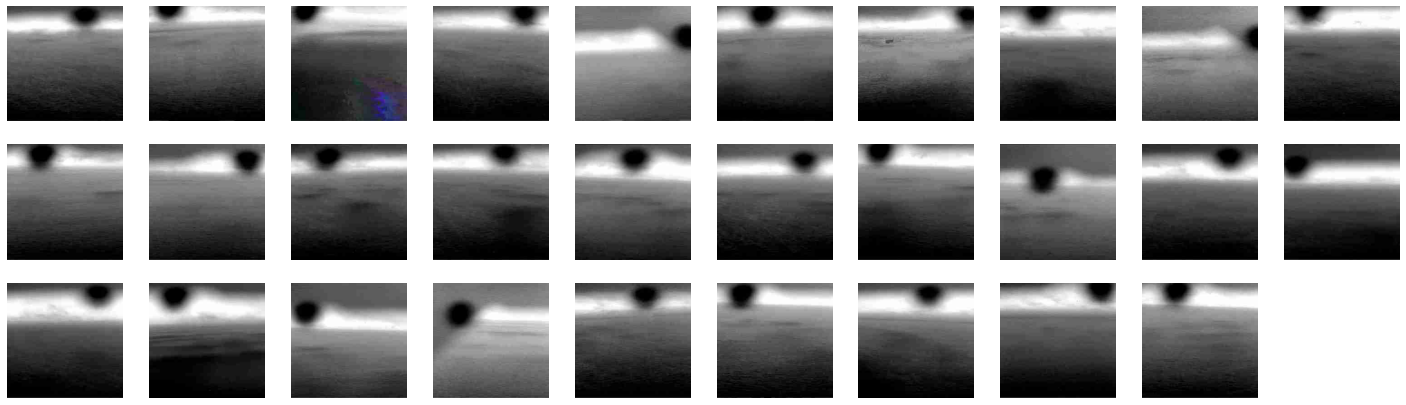

In [71]:
view_cluster(4)

Clipping cluster size from 126 to 30


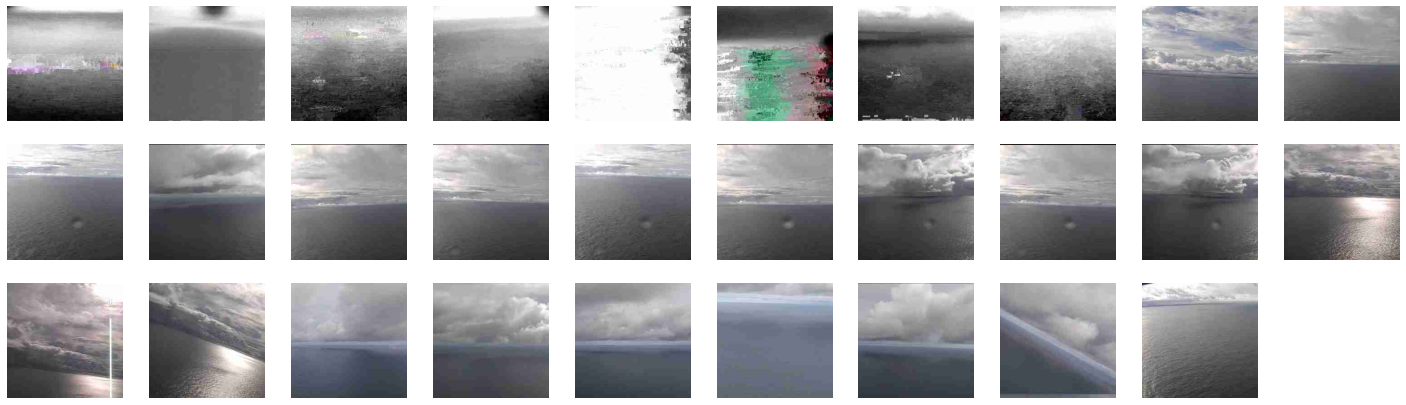

In [72]:
view_cluster(5)

Clipping cluster size from 58 to 30


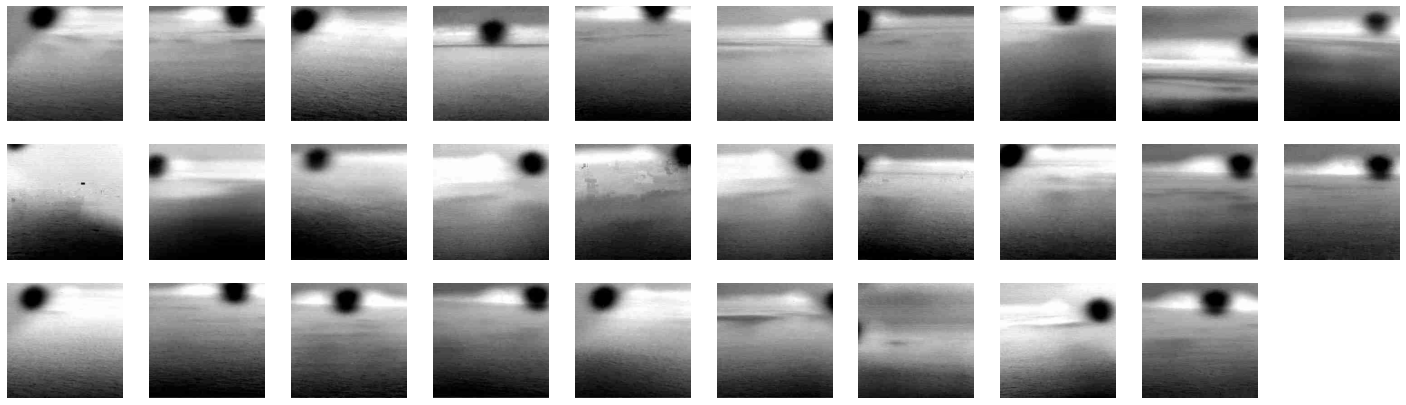

In [73]:
view_cluster(6)

Clipping cluster size from 32 to 30


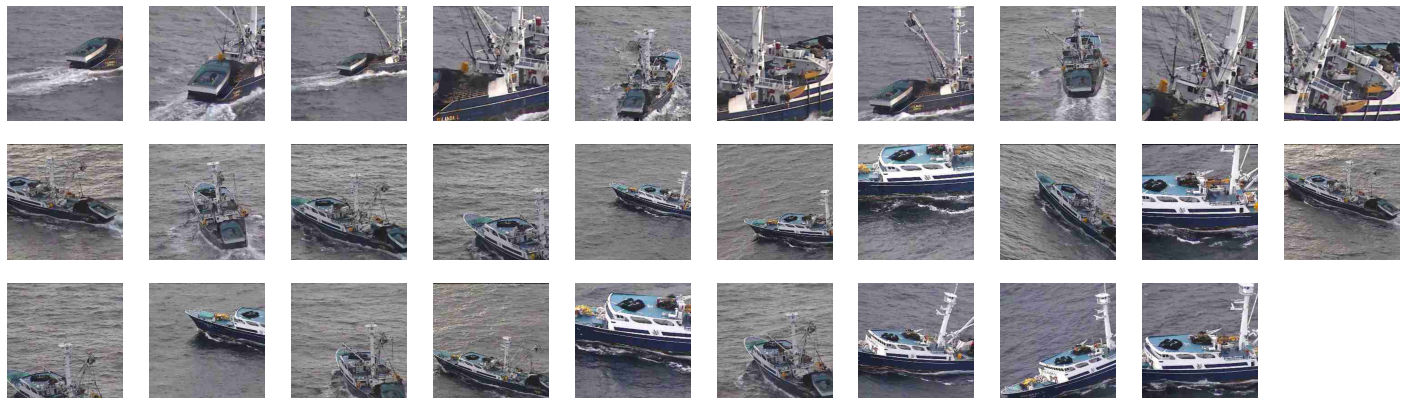

In [74]:
view_cluster(7)

Clipping cluster size from 72 to 30


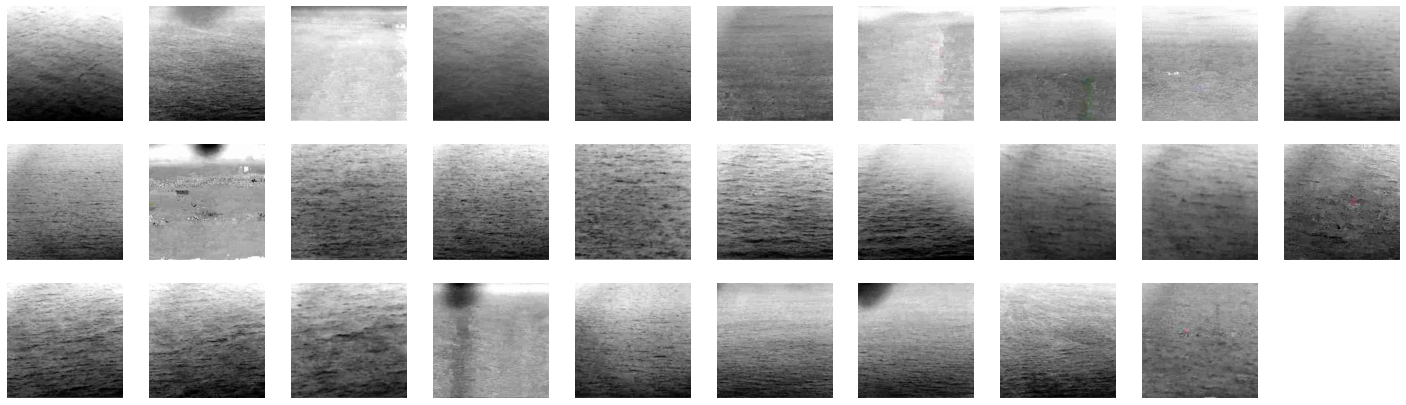

In [75]:
view_cluster(8)

Clipping cluster size from 156 to 30


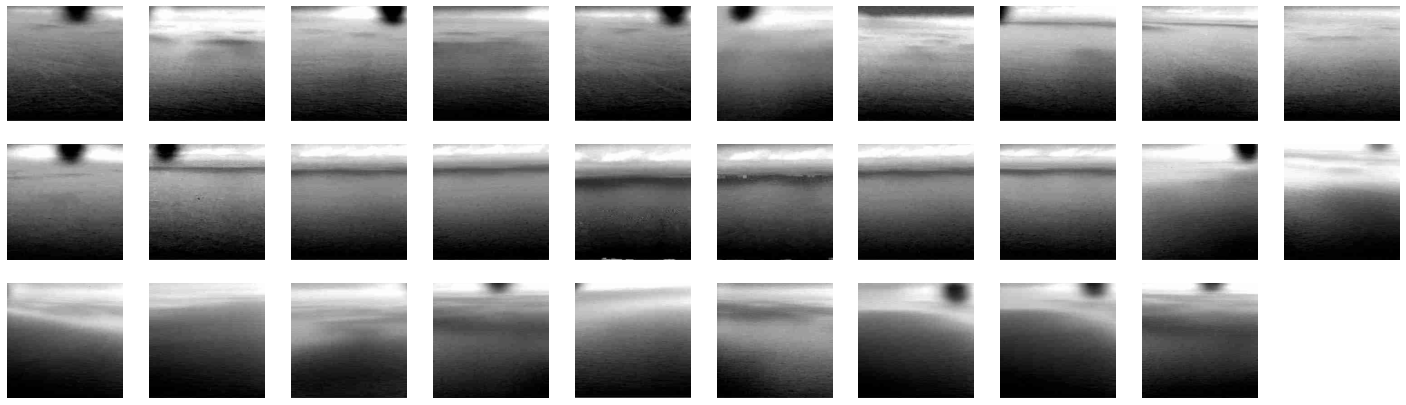

In [76]:
view_cluster(9)

Clipping cluster size from 101 to 30


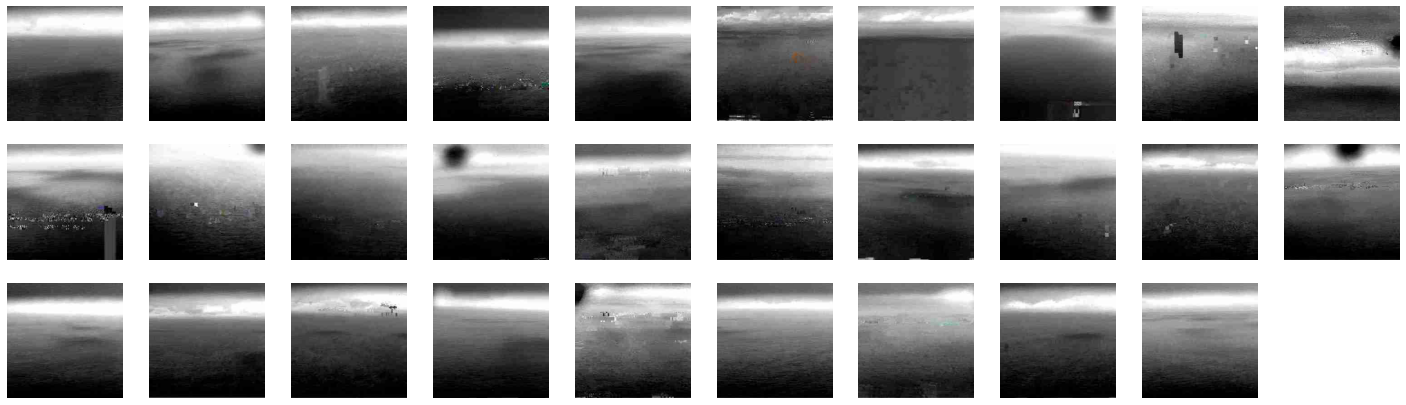

In [77]:
view_cluster(10)

Clipping cluster size from 100 to 30


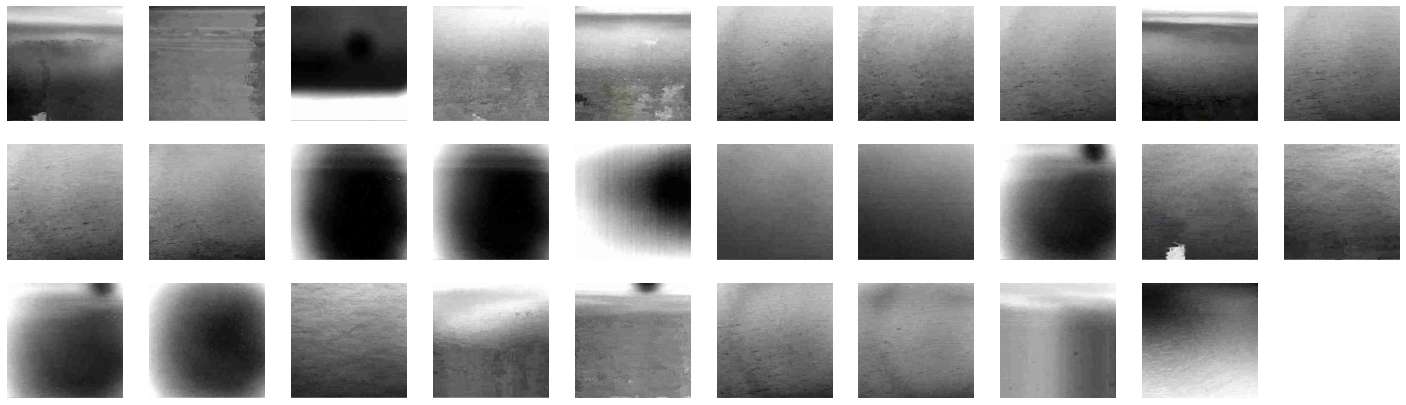

In [78]:
view_cluster(11)

Clipping cluster size from 61 to 30


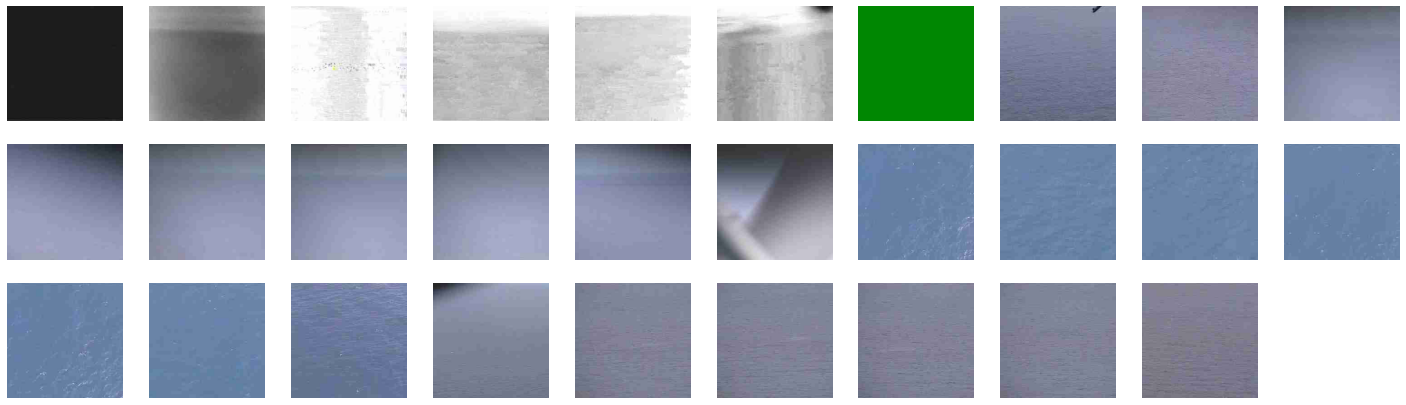

In [79]:
view_cluster(12)

Clipping cluster size from 202 to 30


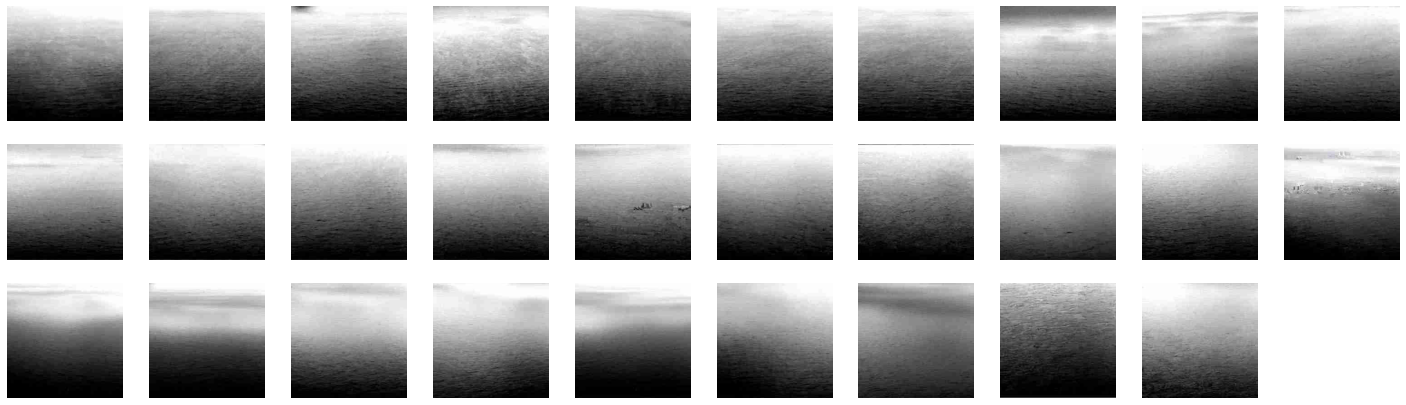

In [80]:
view_cluster(13)

Clipping cluster size from 186 to 30


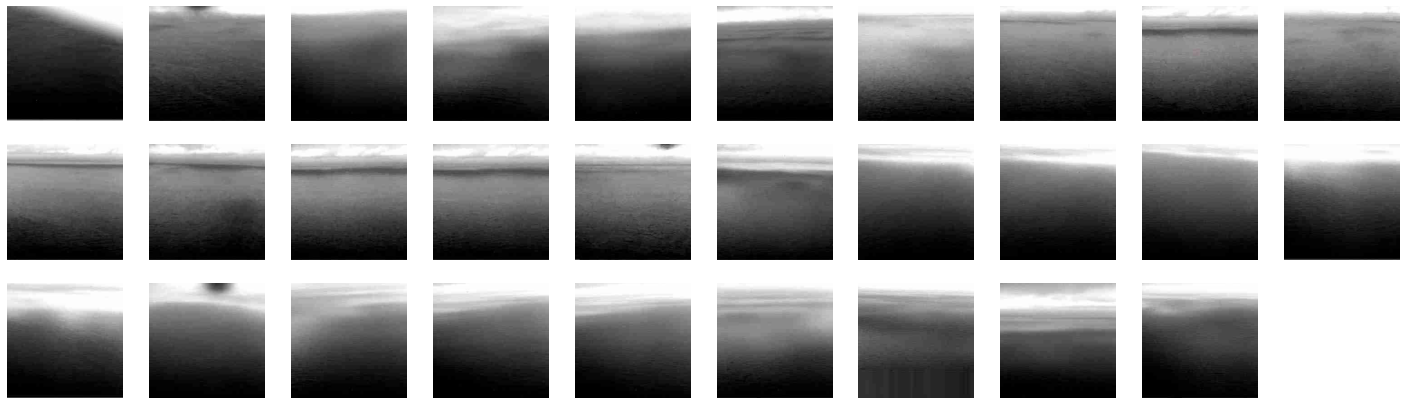

In [81]:
view_cluster(14)

Clipping cluster size from 97 to 30


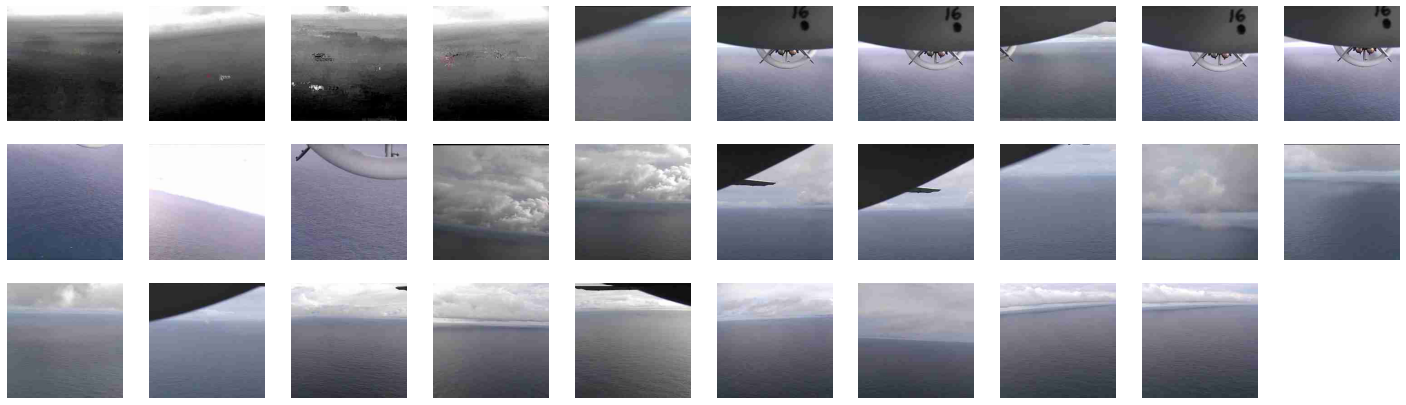

In [82]:
view_cluster(15)

Clipping cluster size from 168 to 30


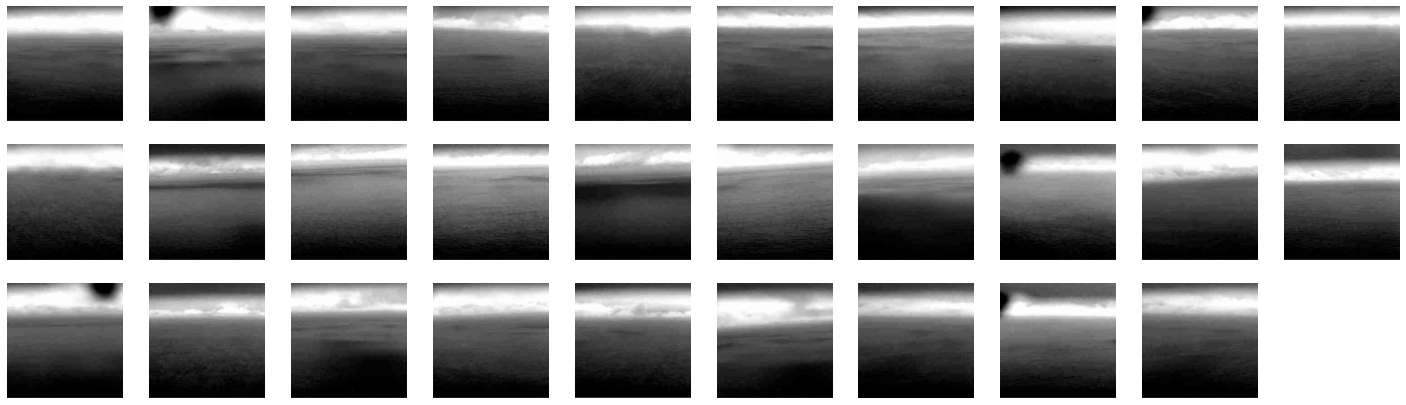

In [83]:
view_cluster(16)

Clipping cluster size from 293 to 30


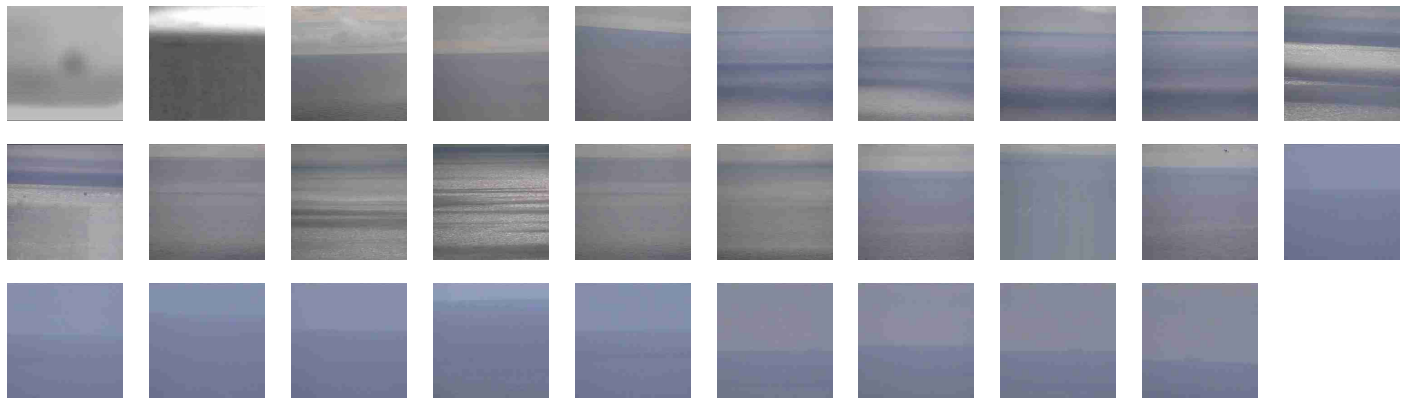

In [84]:
view_cluster(17)

Clipping cluster size from 33 to 30


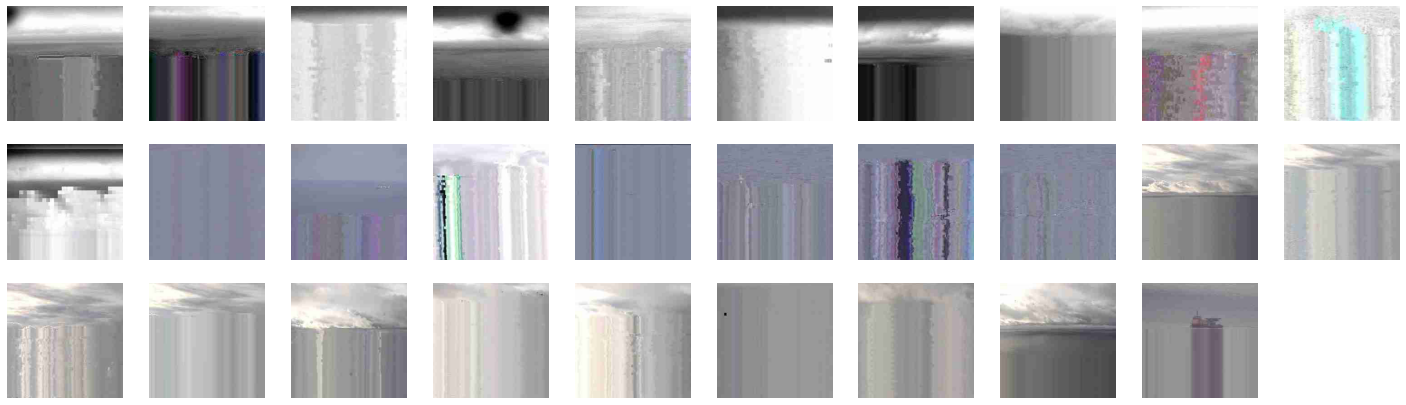

In [85]:
view_cluster(18)

Clipping cluster size from 170 to 30


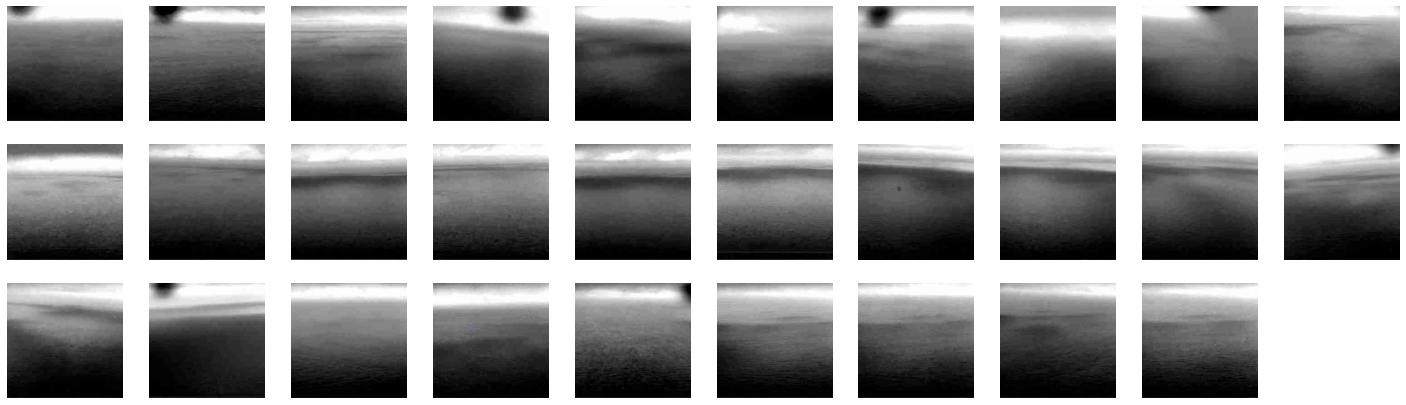

In [86]:
view_cluster(19)

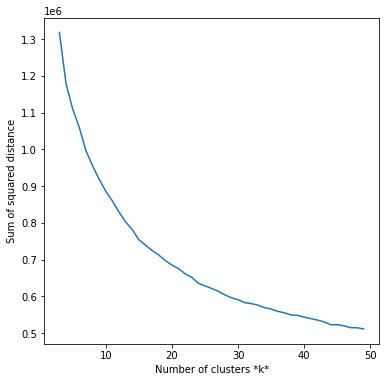

In [88]:
# this is just incase you want to see which value for k might be the best 
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');
        